# **Problem Statement**


---

#### **Business Context**  
Understanding customer personality and behavior is pivotal for businesses to enhance customer satisfaction and increase revenue. Segmentation based on a customer's personality, demographics, and purchasing behavior allows companies to create tailored marketing campaigns, improve customer retention, and optimize product offerings.  

A leading retail company with a rapidly growing customer base seeks to gain deeper insights into their customers' profiles. The company recognizes that understanding customer personalities, lifestyles, and purchasing habits can unlock significant opportunities for personalizing marketing strategies and creating loyalty programs. These insights can help address critical business challenges, such as improving the effectiveness of marketing campaigns, identifying high-value customer groups, and fostering long-term relationships with customers.  

With the competition intensifying in the retail space, moving away from generic strategies to more targeted and personalized approaches is essential for sustaining a competitive edge.  

---

#### **Objective**  
In an effort to optimize marketing efficiency and enhance customer experience, the company has embarked on a mission to identify distinct customer segments. By understanding the characteristics, preferences, and behaviors of each group, the company aims to:  
1. Develop personalized marketing campaigns to increase conversion rates.  
2. Create effective retention strategies for high-value customers.  
3. Optimize resource allocation, such as inventory management, pricing strategies, and store layouts.  

As a data scientist tasked with this project, your responsibility is to analyze the given customer data, apply machine learning techniques to segment the customer base, and provide actionable insights into the characteristics of each segment.  

---

#### **Data Dictionary**  
The dataset includes historical data on customer demographics, personality traits, and purchasing behaviors. Key attributes are:  

1. **Customer Information**  
   - **ID:** Unique identifier for each customer.  
   - **Year_Birth:** Customer's year of birth.  
   - **Education:** Education level of the customer.  
   - **Marital_Status:** Marital status of the customer.  
   - **Income:** Yearly household income (in dollars).  
   - **Kidhome:** Number of children in the household.  
   - **Teenhome:** Number of teenagers in the household.  
   - **Dt_Customer:** Date when the customer enrolled with the company.  
   - **Recency:** Number of days since the customer’s last purchase.  
   - **Complain:** Whether the customer complained in the last 2 years (1 for yes, 0 for no).  

2. **Spending Information (Last 2 Years)**  
   - **MntWines:** Amount spent on wine.  
   - **MntFruits:** Amount spent on fruits.  
   - **MntMeatProducts:** Amount spent on meat.  
   - **MntFishProducts:** Amount spent on fish.  
   - **MntSweetProducts:** Amount spent on sweets.  
   - **MntGoldProds:** Amount spent on gold products.  

3. **Purchase and Campaign Interaction**  
   - **NumDealsPurchases:** Number of purchases made using a discount.  
   - **AcceptedCmp1:** Response to the 1st campaign (1 for yes, 0 for no).  
   - **AcceptedCmp2:** Response to the 2nd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp3:** Response to the 3rd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp4:** Response to the 4th campaign (1 for yes, 0 for no).  
   - **AcceptedCmp5:** Response to the 5th campaign (1 for yes, 0 for no).  
   - **Response:** Response to the last campaign (1 for yes, 0 for no).  

4. **Shopping Behavior**  
   - **NumWebPurchases:** Number of purchases made through the company’s website.  
   - **NumCatalogPurchases:** Number of purchases made using catalogs.  
   - **NumStorePurchases:** Number of purchases made directly in stores.  
   - **NumWebVisitsMonth:** Number of visits to the company’s website in the last month.  

# **Let's start coding!**

## **Importing necessary libraries**

In [78]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## **Loading the data**

In [79]:
# uncomment and run the following line if using Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
# loading data into a pandas dataframe
data = pd.read_csv("/content/drive/MyDrive/DSML/Week 3/Customer_Personality_Segmentation.csv", sep="\t")

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Data Overview**

#### **Question 1**: What are the data types of all the columns?

In [82]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [83]:
# Write your code here.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

##### **Observations:**

#### **Question 2:** Check the statistical summary of the data. What is the average household income?

In [84]:
# Write your code here\
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [85]:
data['Income'].median()

51381.5

##### **Observations:**

#### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [86]:
# Write your code here
data.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [87]:
data['Income'].fillna(data['Income'].mean(), inplace=True)

##### **Observations:**

#### **Question 4**: Are there any duplicates in the data?

In [88]:
# Write your code here
data.duplicated().sum()

np.int64(0)

##### **Observations:**

## **Exploratory Data Analysis**

### Univariate Analysis

#### **Question 5:** Explore all the variables and provide observations on their distributions. (histograms and boxplots)

#### Customer Information

<Axes: xlabel='Education', ylabel='count'>

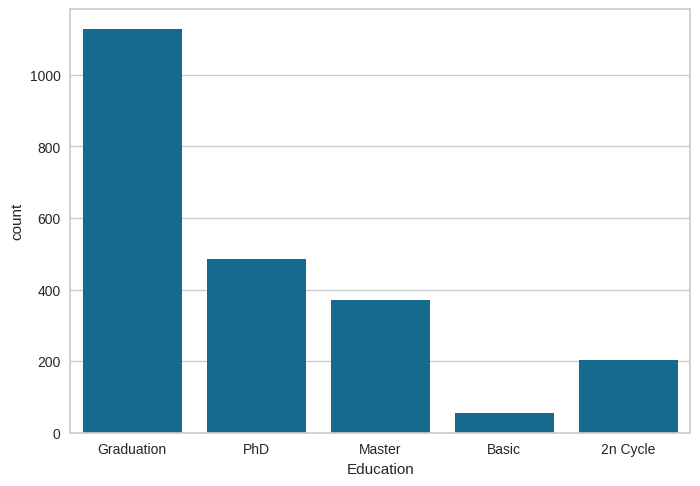

In [89]:
# Write your code here
sns.countplot(data=data, x='Education')

<Axes: xlabel='Year_Birth', ylabel='Count'>

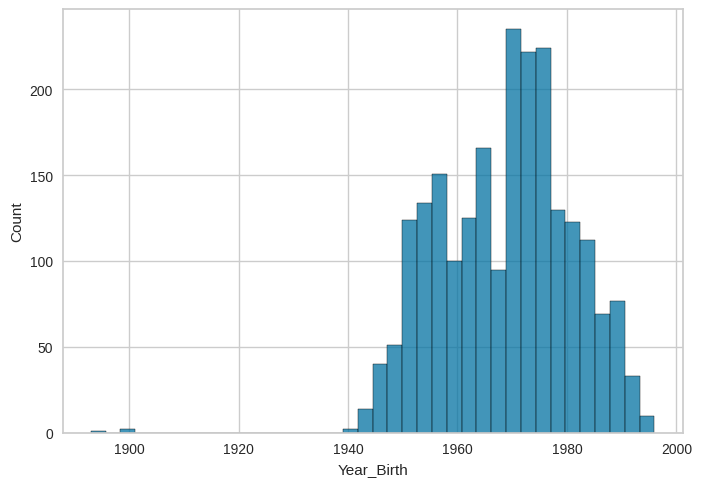

In [90]:
sns.histplot(data = data, x = 'Year_Birth')

**Observation:** 1900+ customers are above a high school diploma.

<Axes: xlabel='Complain', ylabel='count'>

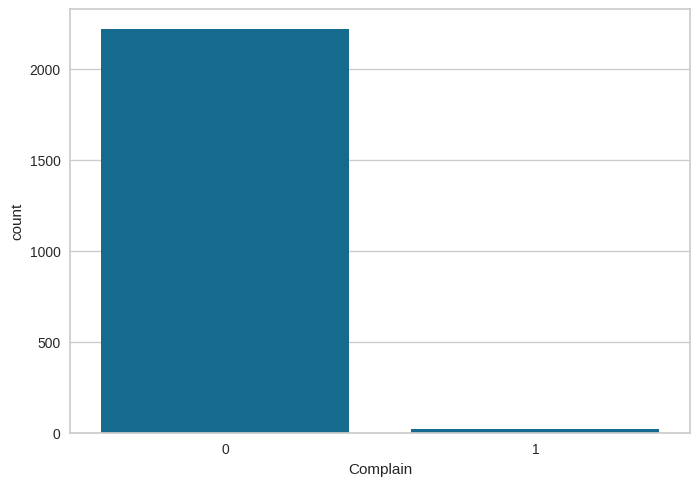

In [91]:
sns.countplot(data=data, x='Complain')

**Obeservation:** Customer relations are well since less than 500 customers have complained in the last 2 years

<Axes: xlabel='Income', ylabel='Count'>

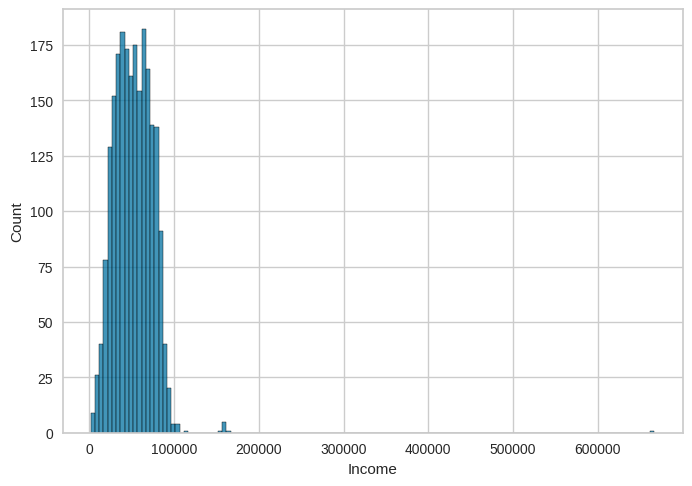

In [92]:
sns.histplot(data=data, x = 'Income')

**Obeservation:** There are outliers in our data that surpass the 150k mark for the income of the customers. The median income is $52k.

<Axes: ylabel='Income'>

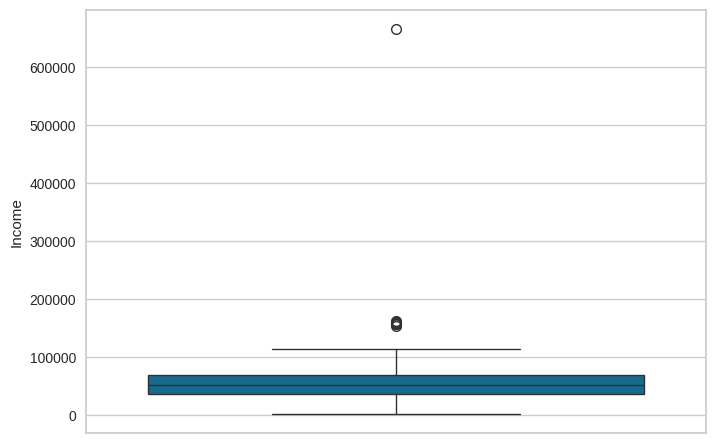

In [93]:
sns.boxplot(data=data, y = 'Income')

<Axes: xlabel='Recency', ylabel='Count'>

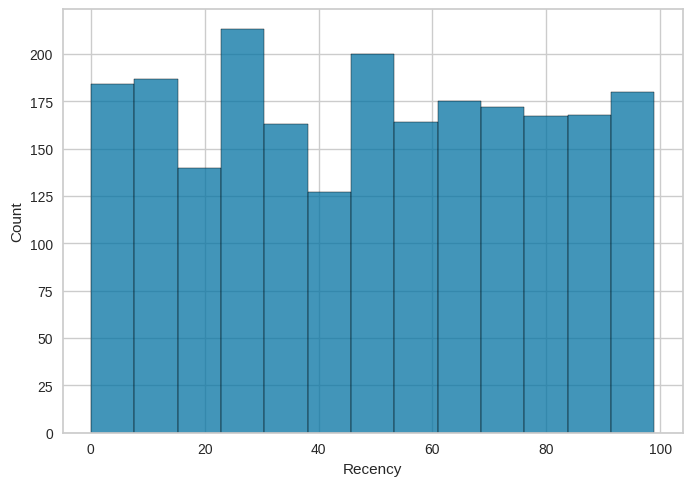

In [94]:
sns.histplot(data=data, x = 'Recency')

The days since the customer's has last purchase is uniformly distributed.

<Axes: xlabel='Kidhome', ylabel='count'>

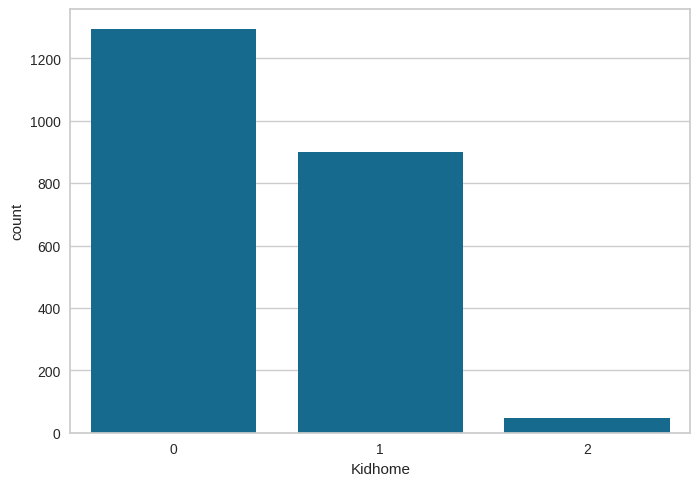

In [95]:
sns.countplot(data = data, x = 'Kidhome')

<Axes: xlabel='Teenhome', ylabel='count'>

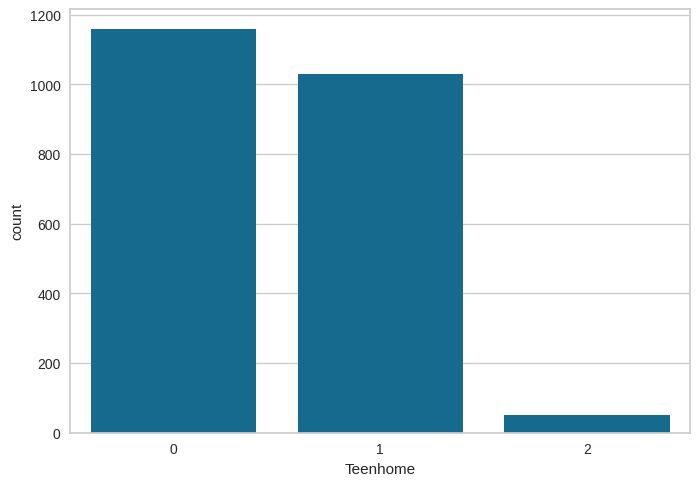

In [96]:
sns.countplot(data = data, x = 'Teenhome')

Most of our customers either have no kids or just a single child or teenager living in the household.

#### Shopping Behavior

<Axes: xlabel='NumWebPurchases', ylabel='Count'>

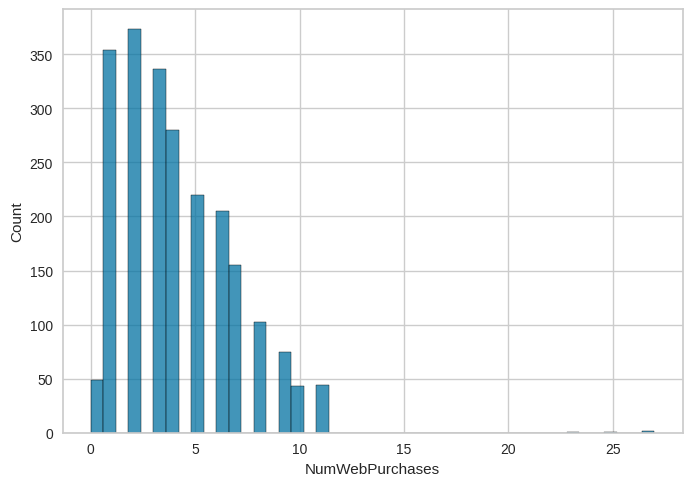

In [97]:
sns.histplot(data=data, x = 'NumWebPurchases')

<Axes: xlabel='NumStorePurchases', ylabel='Count'>

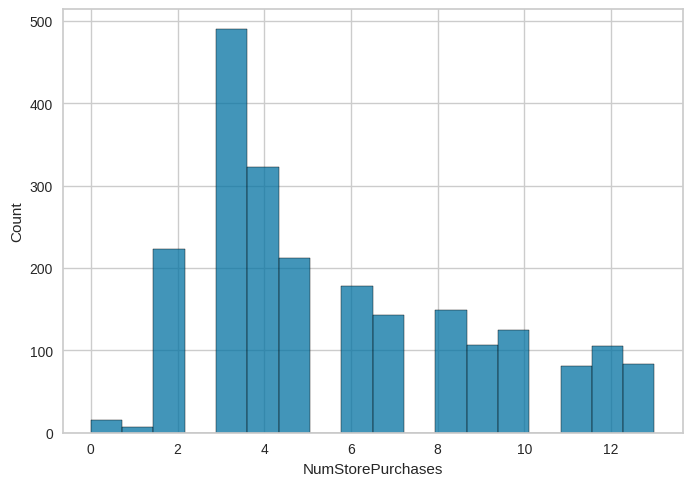

In [98]:
sns.histplot(data=data, x = 'NumStorePurchases')

There is a higher frequency of purchases made in store with 400+ customers coming three times to the store. This suggest that there is room for opportunity to develop the online shopping experience

<Axes: xlabel='NumCatalogPurchases', ylabel='Count'>

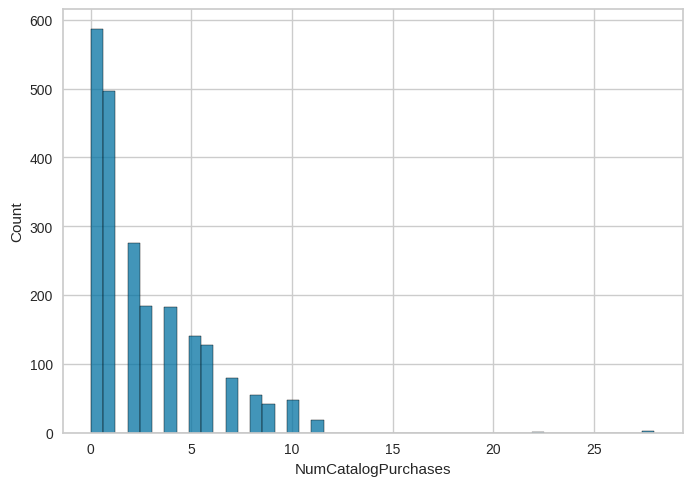

In [99]:
sns.histplot(data=data, x = 'NumCatalogPurchases')

<Axes: xlabel='NumWebVisitsMonth', ylabel='Count'>

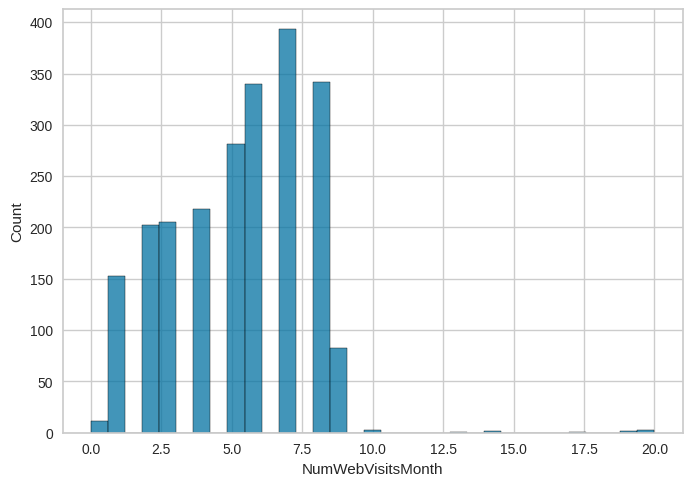

In [100]:
sns.histplot(data=data, x = 'NumWebVisitsMonth')

In the last month, there were 250+ customers visiting the website more than 5 times. Also, 350+ who visited at least 7 times.

#### Purchase and Campaign Interaction

<Axes: xlabel='NumDealsPurchases', ylabel='Count'>

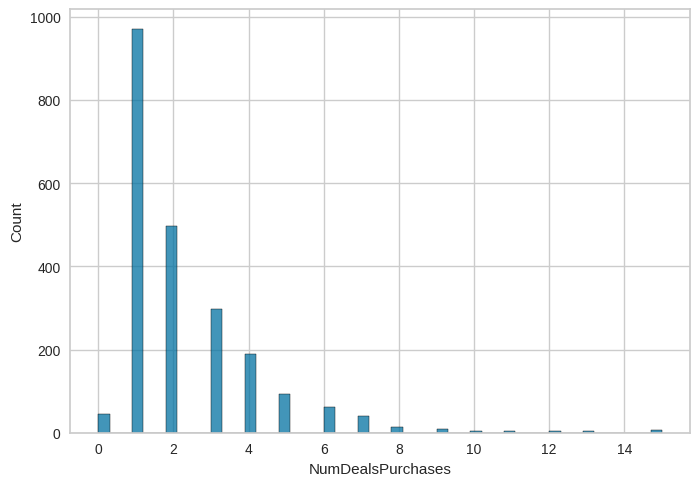

In [101]:
sns.histplot(data = data, x = 'NumDealsPurchases')

The number of purchases made after 1 discount quickly fall after 2, suggesting that there is higher churn for deals follow up.

<Axes: xlabel='AcceptedCmp1', ylabel='count'>

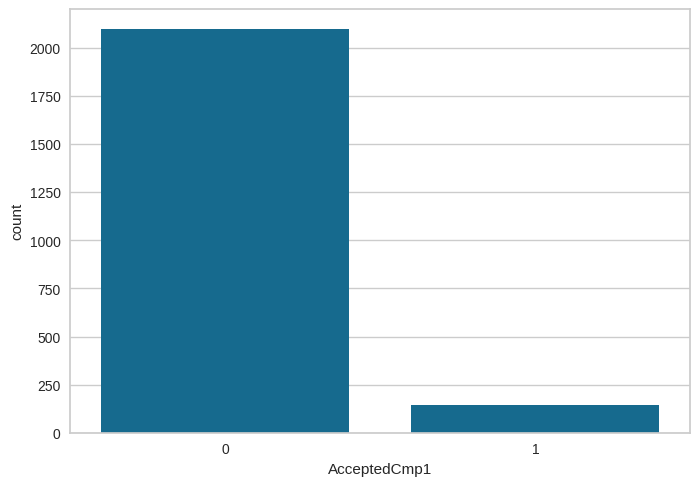

In [102]:
sns.countplot(data = data, x = 'AcceptedCmp1')

Less than 250 customers respond to the first promotion/campaign

<Axes: xlabel='AcceptedCmp2', ylabel='count'>

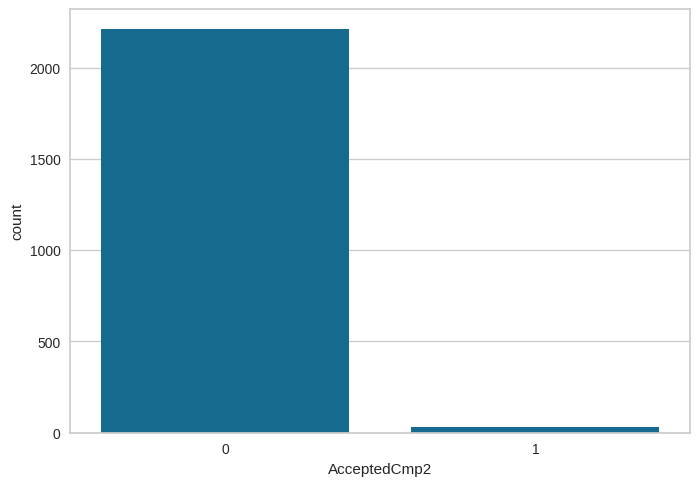

In [103]:
sns.countplot(data = data, x = 'AcceptedCmp2')

<Axes: xlabel='AcceptedCmp3', ylabel='count'>

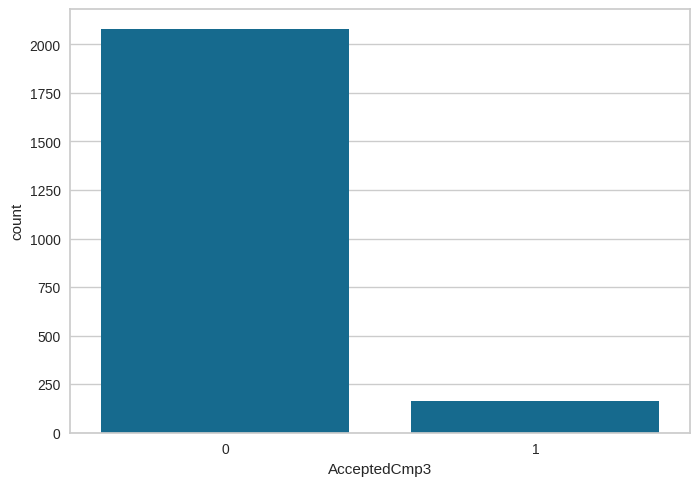

In [104]:
sns.countplot(data = data, x = 'AcceptedCmp3')

<Axes: xlabel='AcceptedCmp4', ylabel='count'>

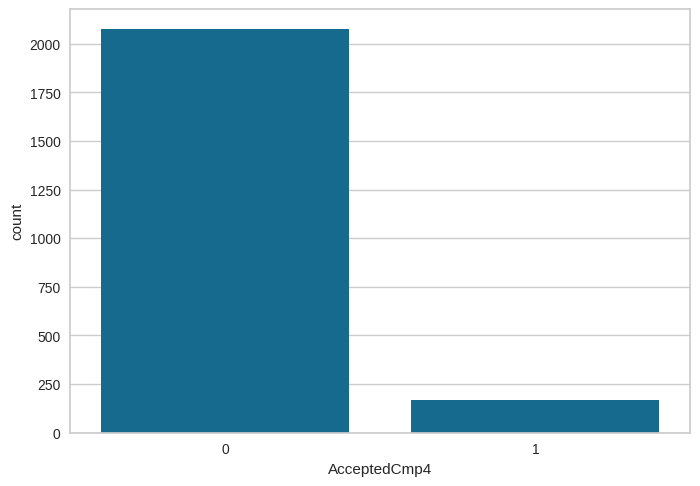

In [105]:
sns.countplot(data = data, x = 'AcceptedCmp4')

<Axes: xlabel='AcceptedCmp5', ylabel='count'>

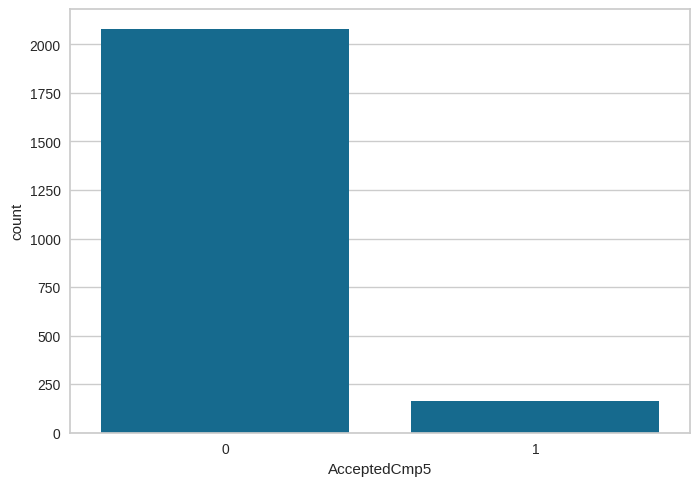

In [106]:
sns.countplot(data = data, x = 'AcceptedCmp5')

<Axes: xlabel='Response', ylabel='count'>

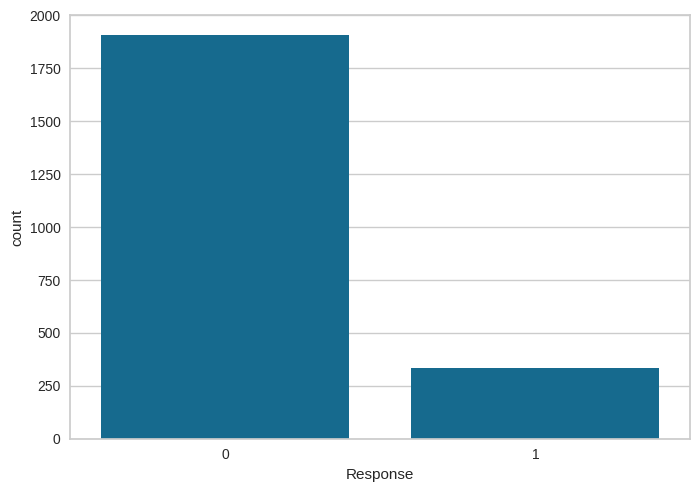

In [107]:
sns.countplot(data = data, x = 'Response')

#### Spending Information over the last two years

<Axes: xlabel='MntWines', ylabel='Count'>

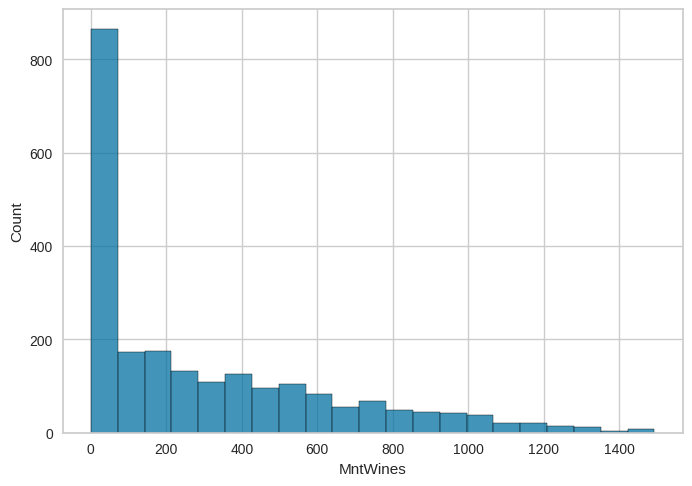

In [108]:
sns.histplot(data=data, x = 'MntWines')

<Axes: xlabel='MntFruits', ylabel='Count'>

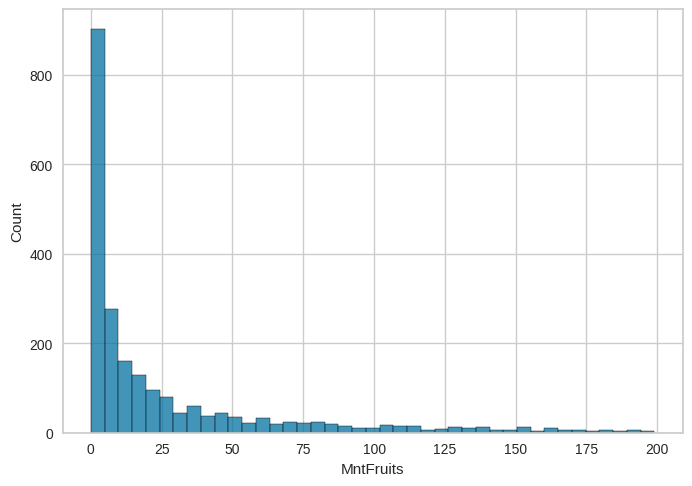

In [109]:
sns.histplot(data=data, x = 'MntFruits')

<Axes: xlabel='MntMeatProducts', ylabel='Count'>

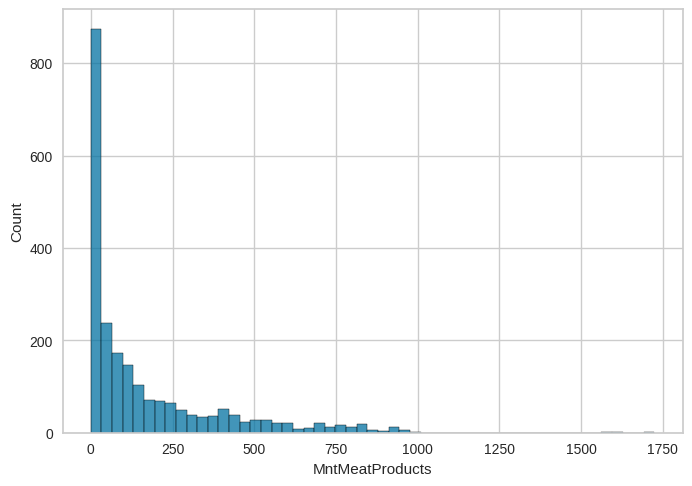

In [110]:
sns.histplot(data=data, x = 'MntMeatProducts')

<Axes: xlabel='MntFishProducts', ylabel='Count'>

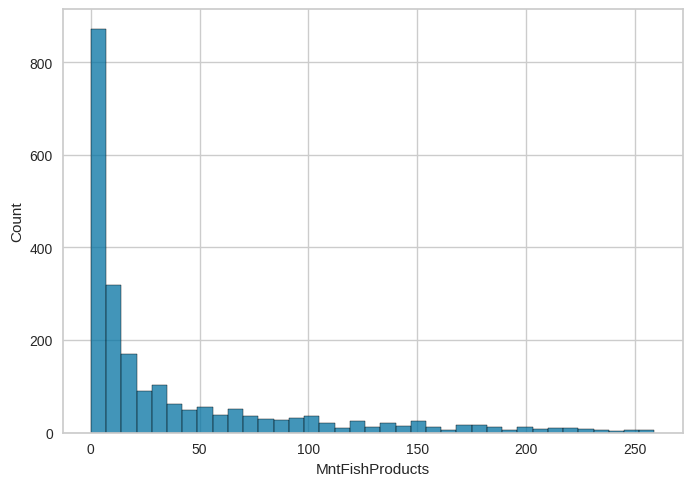

In [111]:
sns.histplot(data=data, x = 'MntFishProducts')

<Axes: xlabel='MntSweetProducts', ylabel='Count'>

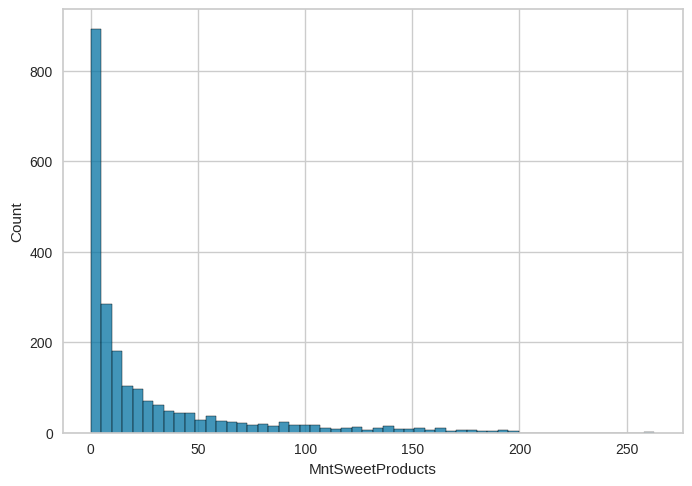

In [112]:
sns.histplot(data=data, x = 'MntSweetProducts')

<Axes: xlabel='MntGoldProds', ylabel='Count'>

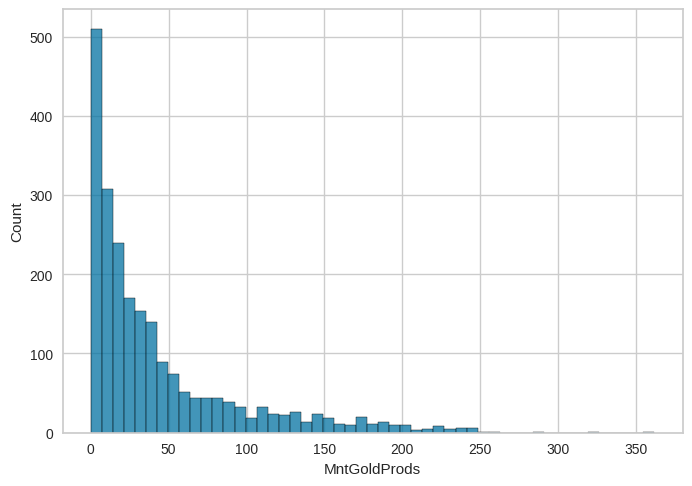

In [113]:
sns.histplot(data=data, x = 'MntGoldProds')

The highest accounts for amounts spent are for the wines and meats category.

##### **Observations:**  Most of the customers are above a high school level education with a median income of $51k. More than 90% of the customer base is above 30 years old. Most of the demographic has either no or 1 child/teen in the houseold. The highest spending frequency is in the wines and meats products. There is a higher frequency of purchases made in store with 400+ customers coming three times to the store. This suggest that there is room for opportunity to develop the online shopping experience. Customers do not seem to be responsive to promotion campaigns.

### Bivariate Analysis

#### **Question 6:** Perform multivariate analysis to explore the relationsips between the variables.

<Axes: xlabel='Education', ylabel='Income'>

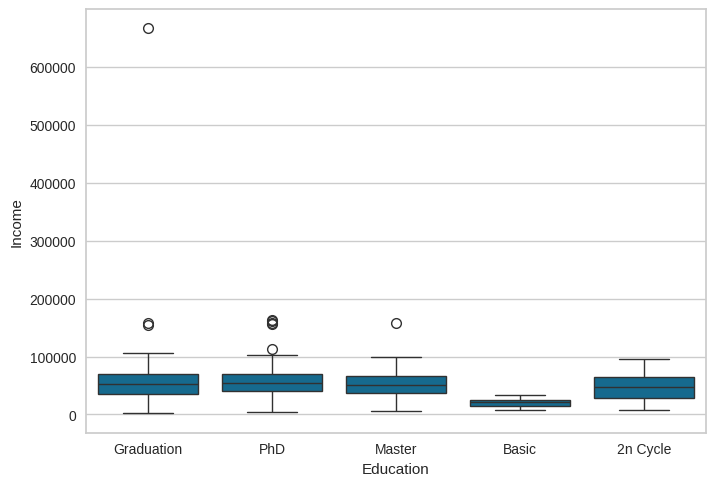

In [114]:
# Write your code here
sns.boxplot(data = data, x = 'Education', y = 'Income')

<Axes: xlabel='Kidhome', ylabel='Income'>

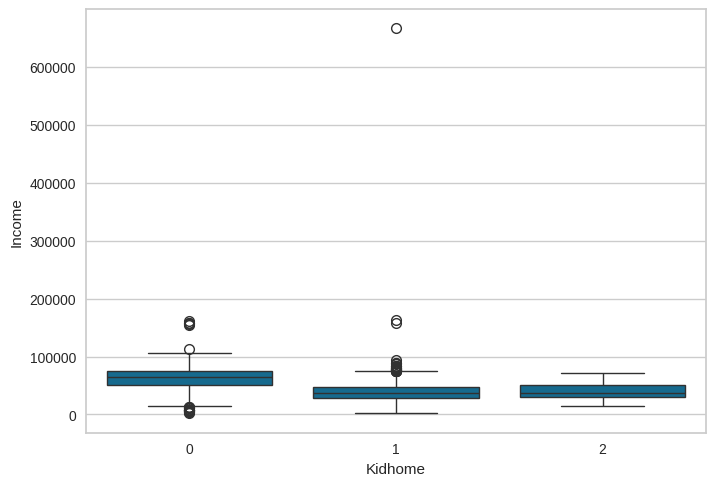

In [115]:
sns.boxplot(data = data, x = 'Kidhome', y = 'Income')

<Axes: xlabel='Teenhome', ylabel='Income'>

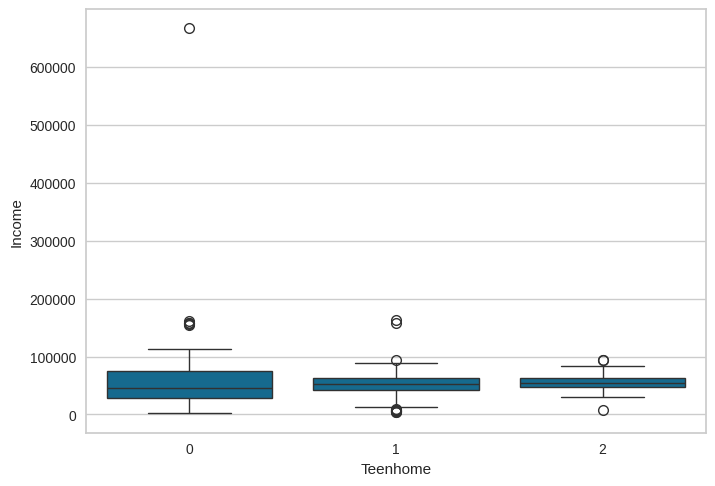

In [116]:
sns.boxplot(data = data, x = 'Teenhome', y = 'Income')

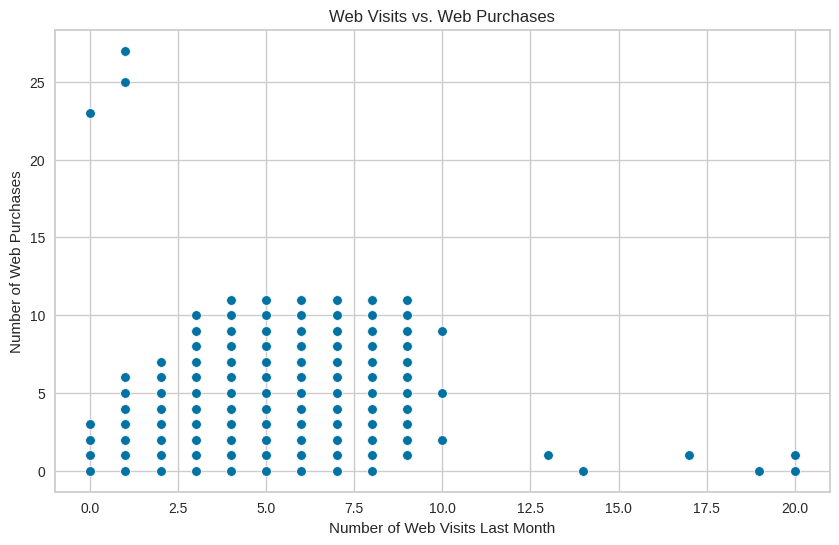

In [117]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='NumWebVisitsMonth', y='NumWebPurchases')
plt.title('Web Visits vs. Web Purchases')
plt.xlabel('Number of Web Visits Last Month')
plt.ylabel('Number of Web Purchases')
plt.grid(True)
plt.show()


    Higher traffic doesn't always mean more purchases: You can see a wide range of web visits, from 0 to 20 per month. However, the number of web purchases doesn't necessarily increase as the number of visits goes up. In fact, many customers who visit the website frequently (e.g., 5-10 times a month) still make a relatively low number of purchases.
    A "sweet spot" for conversions: The highest number of web purchases (around 25-27) seems to come from customers who visit the website only a few times a month (around 7-9 visits). This could indicate a group of highly engaged and decisive customers who know what they want and purchase it without extensive browsing.
    Many visitors don't convert: There's a dense cluster of data points along the bottom of the plot, especially between 5 and 8 monthly visits, where the number of purchases is very low (often 0-5). This suggests that a significant portion of your website traffic isn't converting into sales. These could be customers who are browsing, comparing prices, or are not finding what they're looking for.
    Low-visit, low-purchase customers: There's also a group of customers with a low number of visits (1-4) and a low number of purchases. This might represent infrequent shoppers or new customers who are still exploring your offerings.

In a nutshell, this visualization suggests that simply driving more traffic to your website might not be the most effective strategy for increasing sales. Instead, it would be more beneficial to focus on converting the existing traffic into paying customers. You might want to investigate why so many visitors are not making purchases and consider strategies to improve the user experience, offer more targeted promotions, or simplify the checkout process.

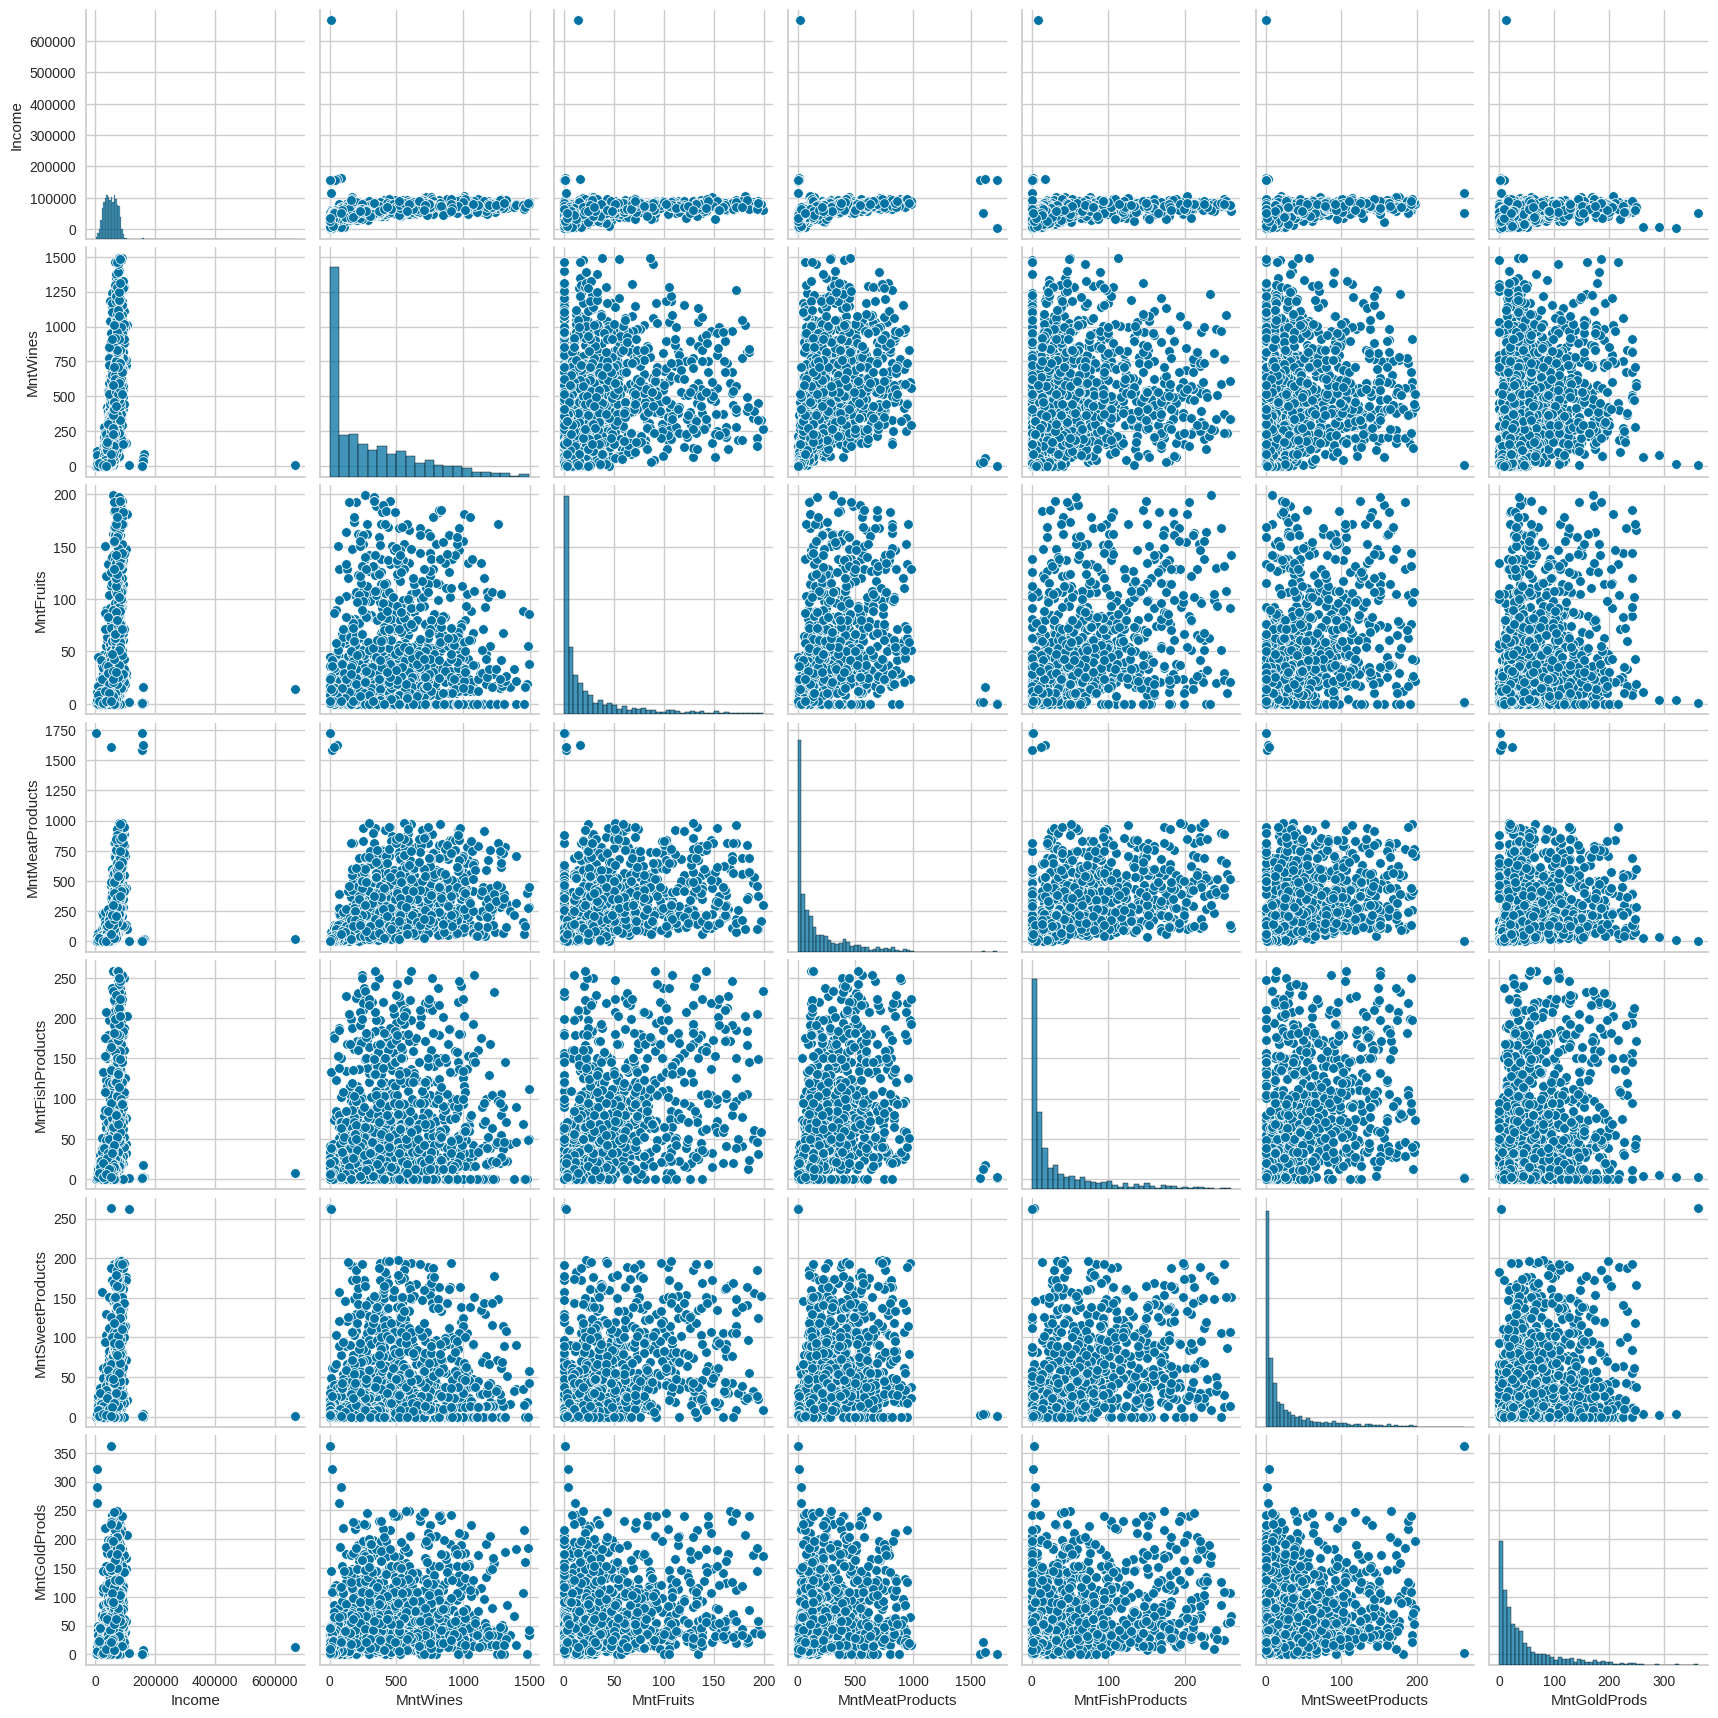

In [118]:
sns.pairplot(data=data, vars=['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'])


Income is a mjor driver of spending on luxury items like wine and meat.

##### **Observations:**

## **K-means Clustering**

#### **Question 7** : Select the appropriate number of clusters using the elbow Plot. What do you think is the appropriate number of clusters?

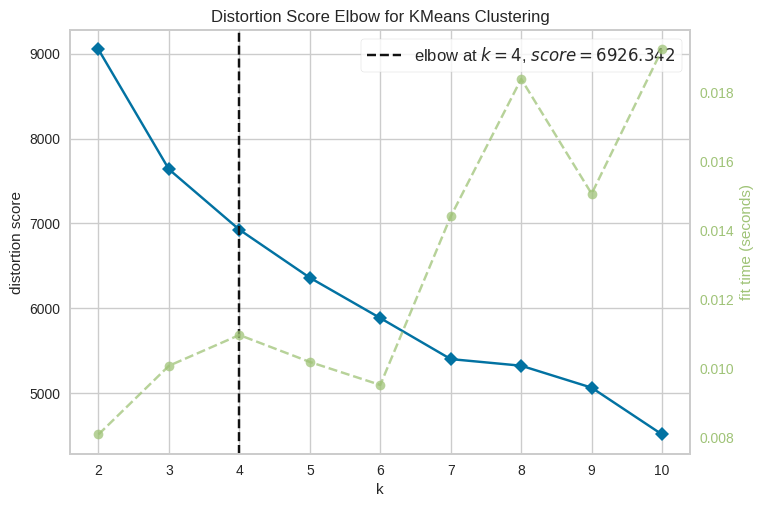

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [119]:
# Write your code here
features = data[['Income', 'MntFruits', 'MntWines', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts','MntGoldProds']]

scaler = StandardScaler()

scaled_features = scaler.fit_transform(features)

visualizer = KElbowVisualizer(KMeans(random_state = 42, n_clusters = (2,11)))

visualizer.fit(scaled_features)

visualizer.show()

##### **Observations:** The elbow in the plot is at 4. Meaning that after 4 clusters, performance does not improve.

#### **Question 8** : finalize appropriate number of clusters by checking the silhoutte score as well. Is the answer different from the elbow plot?

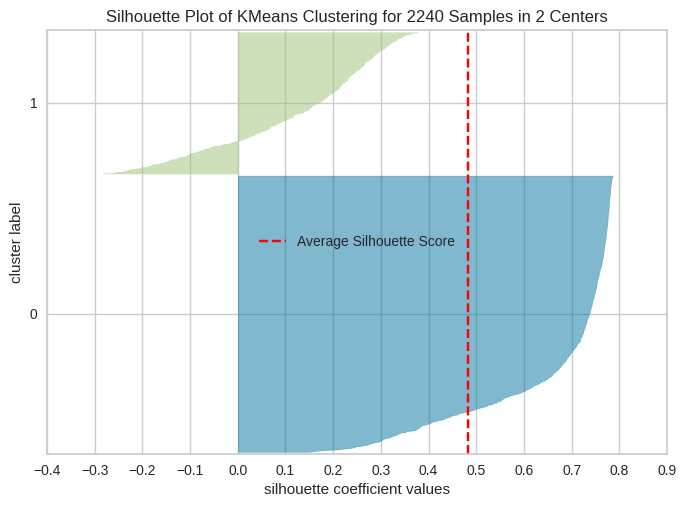

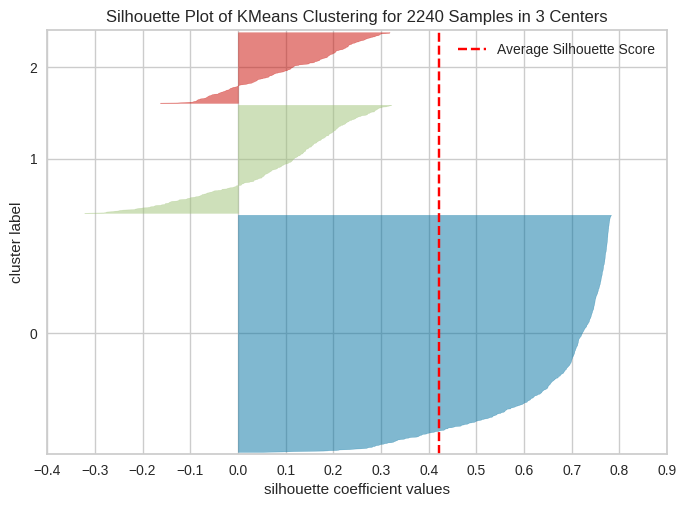

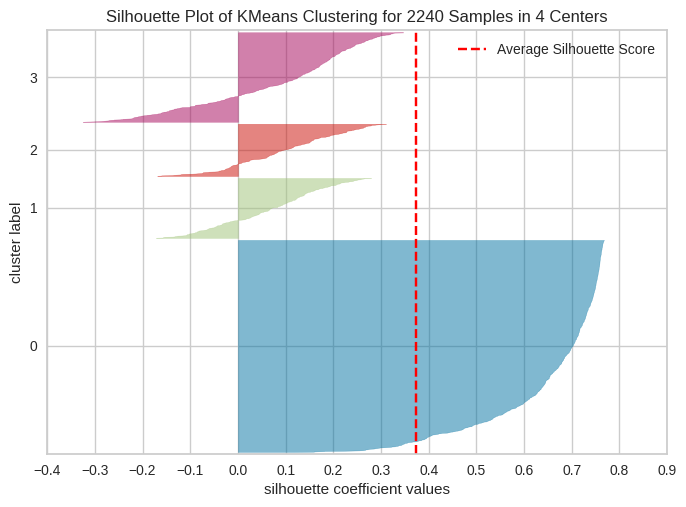

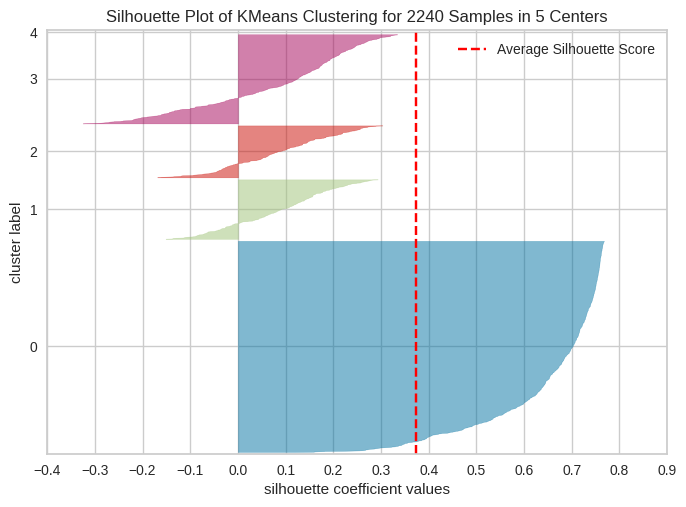

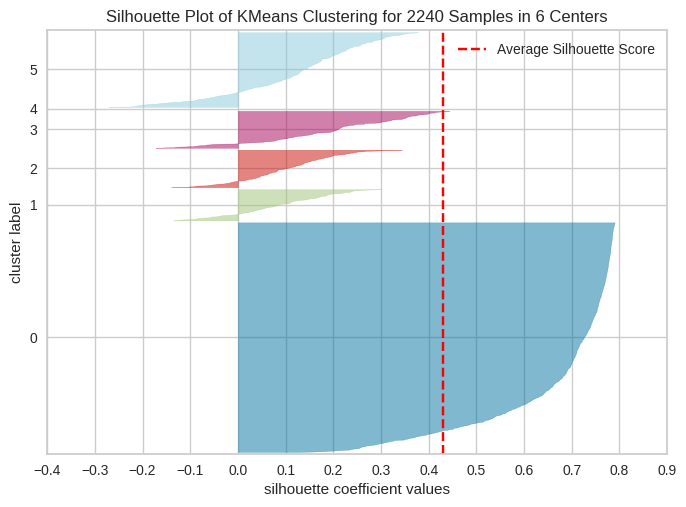

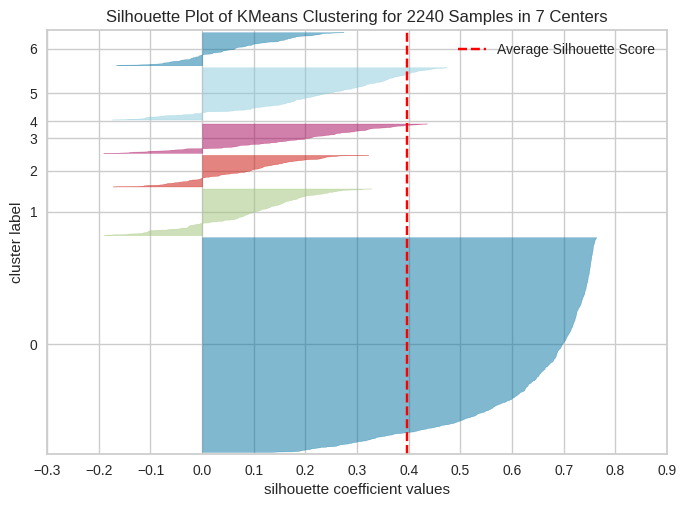

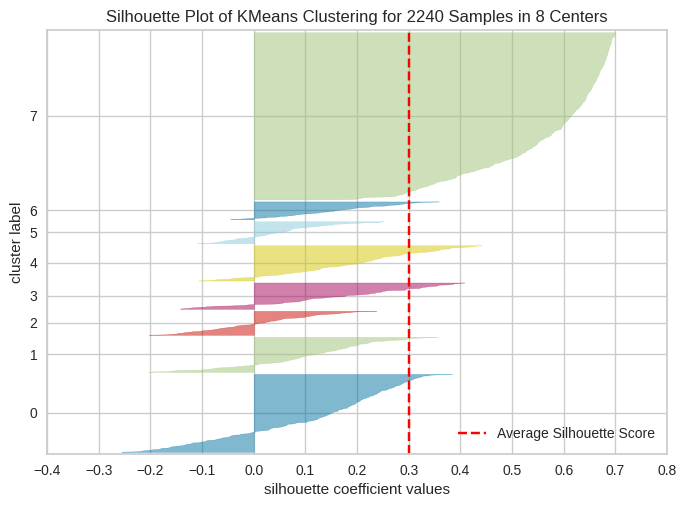

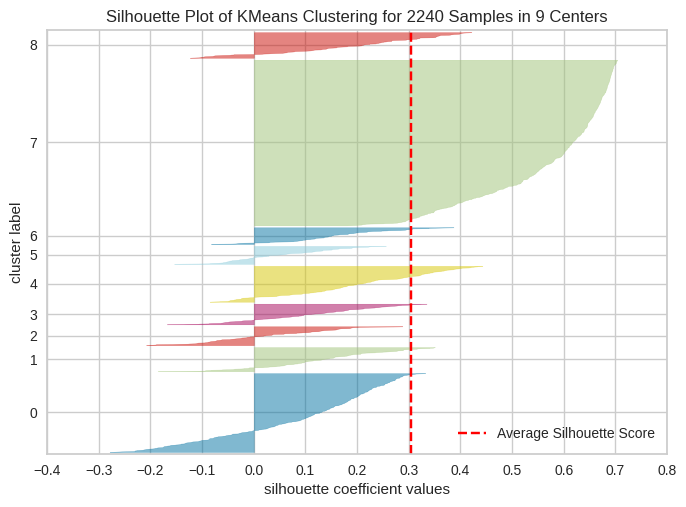

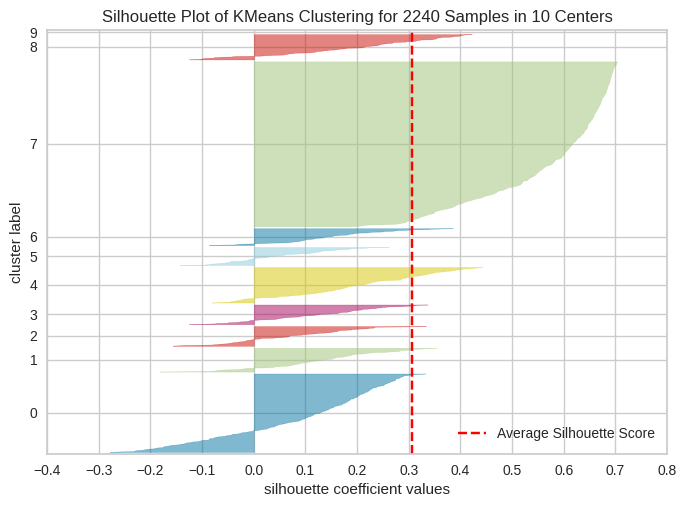

In [120]:
# Write your code here
for i in range(2, 11):
    # Instantiate the K-Means model and the SilhouetteVisualizer
    model = KMeans(n_clusters=i, random_state=42)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

    # Fit the data to the visualizer
    visualizer.fit(scaled_features)

    # Finalize and render the figure
    visualizer.show()

##### **Observations:**

#### **Question 9**: Do a final fit with the appropriate number of clusters. How much total time does it take for the model to fit the data?

In [121]:
# Write your code here
from time import time

t1 = time()
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_features)
t2 = time()
print(f"time taken: {t2-t1}")

time taken: 0.011031150817871094


##### **Observations:**

## **Cluster Profiling and Comparison**

#### **Question 10**: Perform cluster profiling using boxplots for the K-Means algorithm. Analyze key characteristics of each cluster and provide detailed observations.

<Axes: xlabel='cluster', ylabel='Income'>

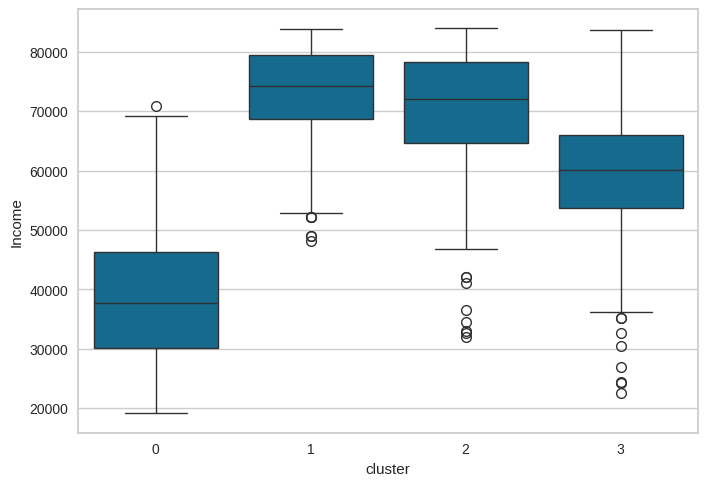

In [122]:
# Write your code here
data['cluster'] = kmeans.labels_

# Filter out outliers
q_low = data['Income'].quantile(0.05)
q_hi  = data['Income'].quantile(0.95)

filtered_data = data[(data['Income'] < q_hi) & (data['Income'] > q_low)]

sns.boxplot(data=filtered_data, x='cluster', y='Income')

Cluster 1 represents the highest income customers, with a median income of approximately 75k. Cluster 2 is the second-highest income group, with a median income of around 75,000.

Cluster 1 has a relatively tight distribution, suggesting that it's a consistently high income group.

Cluster 0 has the lowest median income with around 38k.


<Axes: xlabel='cluster', ylabel='MntMeatProducts'>

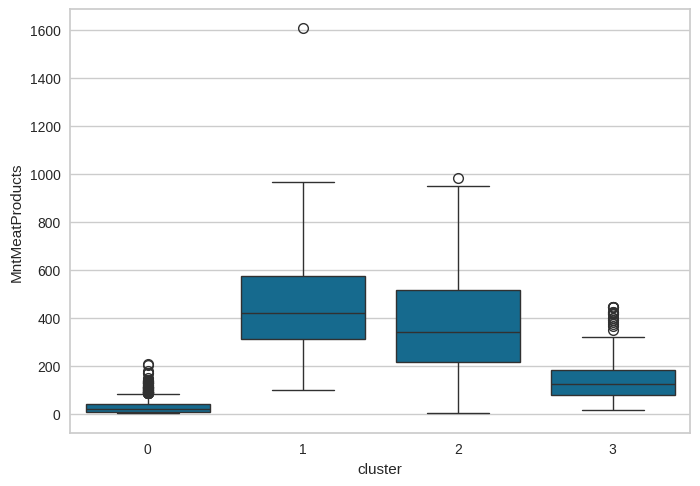

In [123]:
sns.boxplot(data=filtered_data, x='cluster', y='MntMeatProducts')

Cluster 1 spends most of their money on meat products with Cluster 2 following.

<Axes: xlabel='cluster', ylabel='MntWines'>

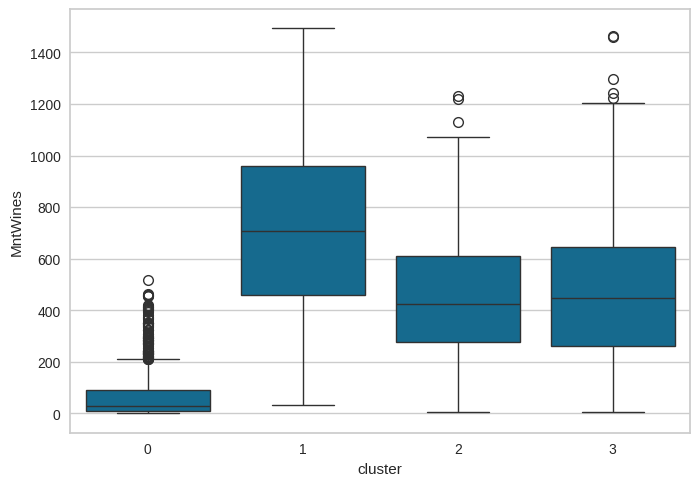

In [124]:
sns.boxplot(data=filtered_data, x='cluster', y='MntWines')

Cluster 1 demonstrates the highest median spending on both wine and meat, suggesting a preference for premium products. The tight interquartile range for both categories indicates consistent high spending within this cluster.

<Axes: xlabel='cluster', ylabel='NumWebPurchases'>

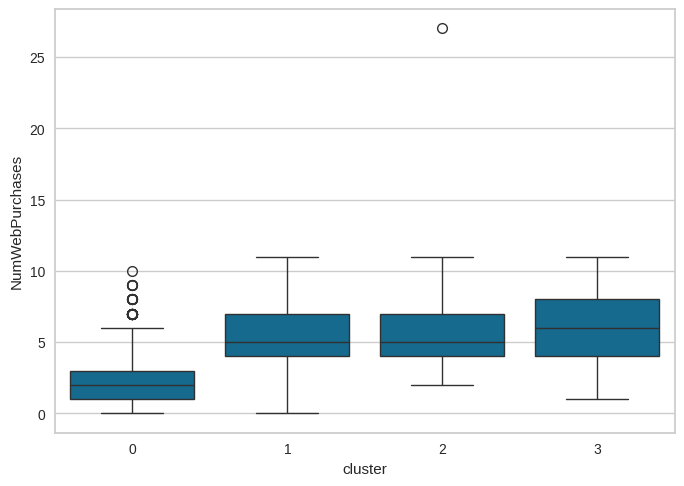

In [125]:
sns.boxplot(data=filtered_data, x='cluster', y='NumWebPurchases')

Cluster 1 has a higher frequency of online purchases with a median of 5 purchases in the last month.

Cluster 3 has the highest median of around 7 web purchases in the last month.

<Axes: xlabel='cluster', ylabel='NumWebVisitsMonth'>

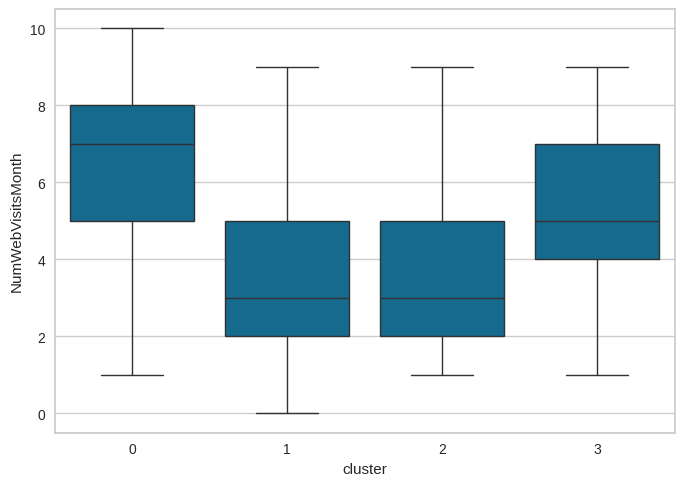

In [126]:
sns.boxplot(data=filtered_data, x='cluster', y='NumWebVisitsMonth')

Cluster 0 has the highest amount of web visits in the last month with a median of around 7. This suggest that there is room for opportunity to convert those visits into purchases.

<Axes: xlabel='cluster', ylabel='NumStorePurchases'>

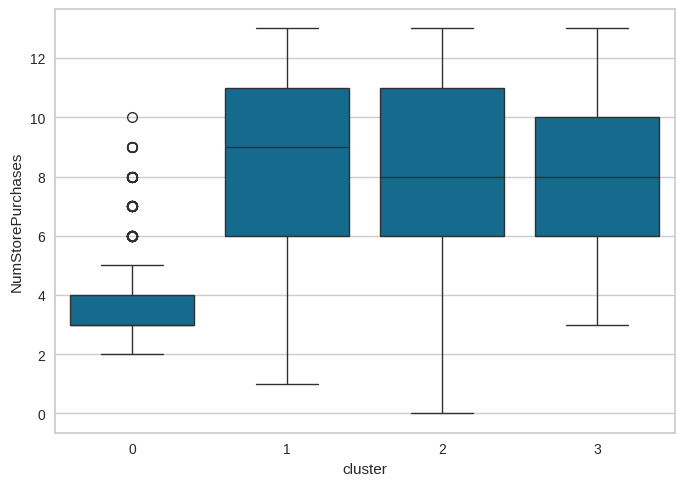

In [127]:
sns.boxplot(data=filtered_data, x='cluster', y='NumStorePurchases')

Cluster 1 has the highest amount of in store purchases

<Axes: xlabel='cluster', ylabel='NumDealsPurchases'>

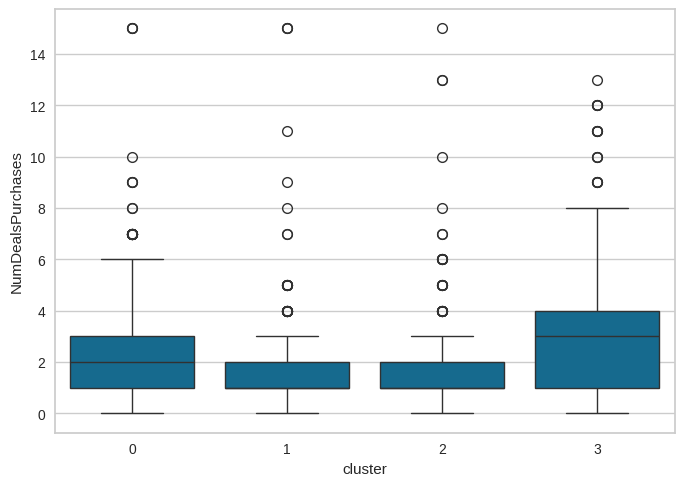

In [128]:
sns.boxplot(data=data, x='cluster', y='NumDealsPurchases')

The highest success rate for offers are within cluster 3. This could explain why they are more responsive to deals and discounts. Recommend sending them more promotional offers and discounts to encourage them to make a purchase.

##### **Observations:**

#### **Question 11**: Perform cluster profiling on the data using a barplot for the K-Means algorithm. Provide insights and key observations for each cluster based on the visual analysis.

<Axes: xlabel='cluster', ylabel='count'>

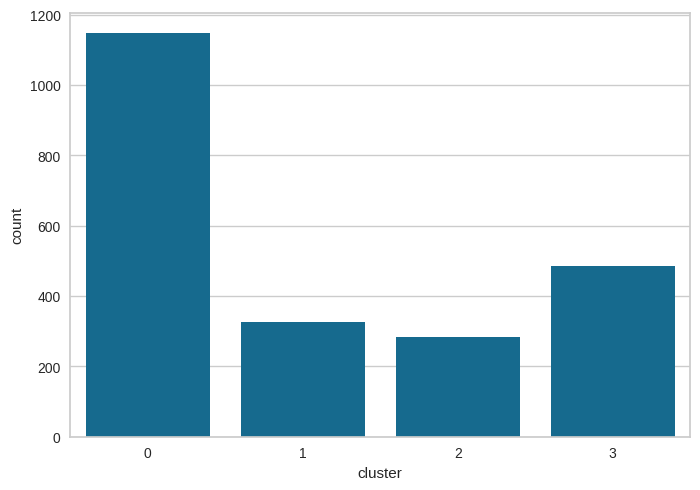

In [129]:
# Write your code her
sns.countplot(data=data, x='cluster')

There are 1000+ customers in Cluster 0 but they represent some of the lowest incomes and spends.

<Axes: xlabel='cluster', ylabel='count'>

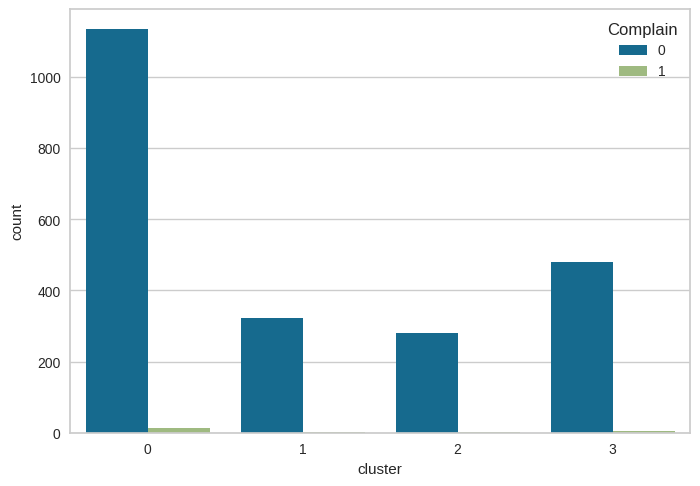

In [130]:
sns.countplot(data=data, x='cluster', hue='Complain')

The only complaints have come from Cluster 0.


<Axes: xlabel='cluster', ylabel='count'>

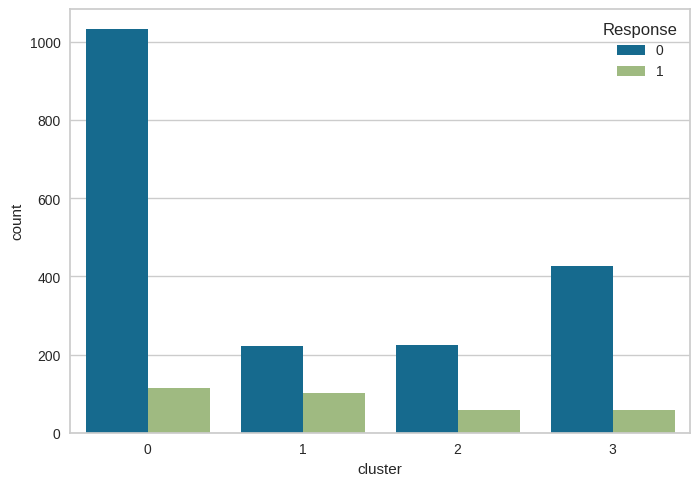

In [131]:
sns.countplot(data=data, x='cluster', hue='Response')

##### **Observations:**

## **Business Recommedations**

#### **Question 12**: Based on the cluster insights, what business recommendations can be provided?

Based on the insights, there are 4 customer segments in the provided data. For security purposes we have aggregated the data. In our analysis we found that the highest value customers are within clusters 1 and 2 since they have the highest median incomes of 75k and 72k respectfully. Cluster 1 has a relatively tight distribution, suggesting that it's a consistently high income group. Cluster 0 has the lowest median income with around 38k. Clusters 1 and 2 spend mostly on luxury items within the meat and wines categories.


The first recommendation to foster growth is to run targeted campaigns towards our high value customers to increase Life Time Value. We should create exclusive offers in the meat and wine segments through in store tastings or loyalty programs. Also, build a recommendation system to pair their frequent purchases with items that go well with them. Lastly, we could offer in store promotions since they also represent a large majority of in store purchasing.

Cluster 3 represents budget conscious customers that respond to discounts and promotions. We can offer them coupons, discounts and bundle deals while highlighting the value of our products to encourage them to make quality buys within their budget.

Cluster 0 has the highest amount of online traffic but the lowest conversion rate to a purchase. It's worth revising the user journey on the web application to identify pain points. Also, making a reminder system to customers can revisit and potentially incentivize their purchase.
